In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
np.set_printoptions(suppress=True, precision=3)

In [3]:
from multiproduct import generate_dataset

In [4]:
n_nodes = 15
n_levels = 4
n_items = 3

nodes, supplies, demands, costs, capacities = generate_dataset(
            n_nodes, n_levels, total_supplies=[400]*n_items, 
            total_demands=[500]*n_items, transp_costs=(100,1000), 
            random_state=42)        

In [194]:
%config InlineBackend.close_figures=False
from multiproduct_dashboard import run_multiobjective_GA

In [195]:
plt.ioff()

In [202]:
%%time
# CPU times: user 17.3 s, sys: 380 ms, total: 17.7 s
# Wall time: 33.6 s
pop, hof, log, toolbox = run_multiobjective_GA(nodes, supplies, demands, costs,
                            capacities, pop_size=100, n_generations=50, 
                            print_log=True, early_stopping_rounds=10,
                            plot_log=True, plot_pop=True, plot_fairness=True)

VBox(children=(Output(), HBox(children=(Output(), Output()), layout=Layout(align_items='center', display='flex', flex_flow='row', justify_content='space-around', margin='0 auto', max_width='800px', width='100%'))), layout=Layout(align_items='center', display='flex', flex_flow='column', justify_content='space-around', margin='0 auto', max_width='800px', width='100%'))

Gen:   0 | Min f1(x): 1903718.00 | Min f2(x): 15.08
Gen:   1 | Min f1(x): 1903718.000 | Min f2(x): 15.058
Gen:   2 | Min f1(x): 1899052.000 | Min f2(x): 15.045
Gen:   3 | Min f1(x): 1868893.000 | Min f2(x): 15.045
Gen:   4 | Min f1(x): 1868893.000 | Min f2(x): 14.885
Gen:   5 | Min f1(x): 1868485.000 | Min f2(x): 14.658
Gen:   6 | Min f1(x): 1868485.000 | Min f2(x): 14.132
Gen:   7 | Min f1(x): 1859531.000 | Min f2(x): 14.132
Gen:   8 | Min f1(x): 1845395.000 | Min f2(x): 14.132
Gen:   9 | Min f1(x): 1834646.000 | Min f2(x): 14.132
Gen:  10 | Min f1(x): 1834646.000 | Min f2(x): 14.132
Gen:  11 | Min f1(x): 1834646.000 | Min f2(x): 13.819
Gen:  12 | Min f1(x): 1834646.000 | Min f2(x): 13.819
Gen:  13 | Min f1(x): 1821054.000 | Min f2(x): 13.819
Gen:  14 | Min f1(x): 1821054.000 | Min f2(x): 13.819
Gen:  15 | Min f1(x): 1821054.000 | Min f2(x): 13.819
Gen:  16 | Min f1(x): 1821054.000 | Min f2(x): 13.819
Gen:  17 | Min f1(x): 1821054.000 | Min f2(x): 13.819
Gen:  18 | Min f1(x): 1820531.

In [33]:
nodes, supplies, demands, costs, capacities

([2, 3, 2, 8],
 [[230, 170, 100], [210, 190, 100], [150, 250, 100]],
 [[50, 50, 60, 40, 40, 90, 30, 140, 0],
  [50, 60, 50, 100, 20, 50, 40, 130, 0],
  [50, 40, 90, 40, 60, 80, 30, 110, 0]],
 [array([[963, 810, 919],
         [588, 739, 650]]), array([[437, 971],
         [740, 878],
         [572, 250]]), array([[514, 397, 710, 362, 863, 243, 445, 723],
         [671, 980, 101, 996, 403, 353, 751, 552]])],
 [[590, 610],
  [489, 515, 665],
  [719, 936],
  [150, 150, 200, 180, 120, 220, 100, 380]])

In [69]:
from collections import namedtuple
from multiproduct_dashboard import transportation_tree

def best_individual(pop, nodes, supplies, demands, costs, capacities, obj=1):
    assert obj in [1,2]
    best = pop[min(range(len(pop)), key=lambda i: pop[i].fitness.values[obj-1])]
    n_items = len(supplies)
    permutation_size = sum([n_items * sum(nodes[1:])])
    Solution = namedtuple('Solution', ['X', 'chromosome', 'fitness'])
    return Solution(transportation_tree(best[:permutation_size], nodes, 
                       supplies, demands, costs, capacities, 
                       best[permutation_size:]), best, best.fitness.values)

In [166]:
def plot_fairness(pop, nodes, supplies, demands, costs, capacities, obj=2):
    # obj 1: best cost | obj 2: best fairness
    best_fairness = best_individual(pop, nodes, supplies, demands, costs, capacities, obj=obj)
    satisfied_demand = best_fairness.X[-1].sum(1)
    pending_demand = np.array(demands)[:,:-1]
    relative_satisfied_demand = np.divide(satisfied_demand, pending_demand).reshape(-1)
    plt.bar(x=range(len(relative_satisfied_demand)), height=relative_satisfied_demand)

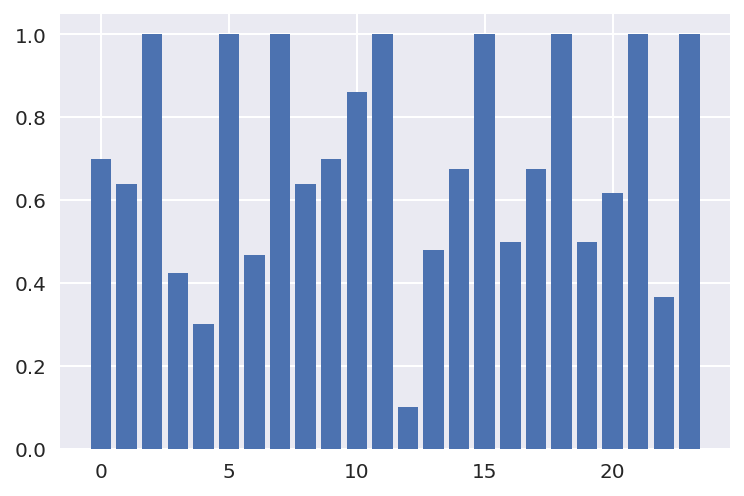

In [169]:
%matplotlib inline
plot_fairness(pop, nodes, supplies, demands, costs, capacities, obj=2)

In [70]:
best_cost = best_individual(pop, nodes, supplies, demands, costs, capacities, obj=1)

In [71]:
best_fairness = best_individual(pop, nodes, supplies, demands, costs, capacities, obj=2)

In [65]:
best_cost.fitness, best_fairness.fitness

((1799845.0, 16.830292378328743), (1848093.0, 13.193575000000001))

In [73]:
from multiproduct_dashboard import plot_graph

In [114]:
capacities

[[590, 610],
 [489, 515, 665],
 [719, 936],
 [150, 150, 200, 180, 120, 220, 100, 380]]

In [113]:
supplies, demands

([[230, 170, 100], [210, 190, 100], [150, 250, 100]],
 [[50, 50, 60, 40, 40, 90, 30, 140, 0],
  [50, 60, 50, 100, 20, 50, 40, 130, 0],
  [50, 40, 90, 40, 60, 80, 30, 110, 0]])

In [142]:
demands

[[50, 50, 60, 40, 40, 90, 30, 140, 0],
 [50, 60, 50, 100, 20, 50, 40, 130, 0],
 [50, 40, 90, 40, 60, 80, 30, 110, 0]]

In [139]:
best_fairness.X[-1].sum(1)

array([[ 35.,  32.,  60.,  17.,  12.,  90.,  14., 140.],
       [ 32.,  42.,  43., 100.,   2.,  24.,  27., 130.],
       [ 25.,  27.,  90.,  20.,  37.,  80.,  11., 110.]])

In [145]:
np.divide(best_fairness.X[-1].sum(1), np.array(demands)[:,:-1])

array([[0.7  , 0.64 , 1.   , 0.425, 0.3  , 1.   , 0.467, 1.   ],
       [0.64 , 0.7  , 0.86 , 1.   , 0.1  , 0.48 , 0.675, 1.   ],
       [0.5  , 0.675, 1.   , 0.5  , 0.617, 1.   , 0.367, 1.   ]])

In [177]:
x = np.divide(best_cost.X[-1].sum(1), np.array(demands)[:,:-1])

In [146]:
x = np.divide(best_cost.X[-1].sum(1), np.array(demands)[:,:-1])

array([[0.6  , 0.4  , 1.   , 0.35 , 1.   , 1.   , 0.2  , 1.   ],
       [0.5  , 1.   , 1.   , 0.59 , 1.   , 1.   , 0.15 , 1.   ],
       [1.   , 1.   , 1.   , 0.9  , 1.   , 0.85 , 0.967, 0.245]])

In [176]:
x = np.divide(best_cost.X[-1].sum(1), np.array(demands)[:,:-1]).transpose((1,0))

In [175]:
np.divide(best_cost.X[-1].sum(1), np.array(demands)[:,:-1]).transpose((1,0))

array([[0.6  , 0.5  , 1.   ],
       [0.4  , 1.   , 1.   ],
       [1.   , 1.   , 1.   ],
       [0.35 , 0.59 , 0.9  ],
       [1.   , 1.   , 1.   ],
       [1.   , 1.   , 0.85 ],
       [0.2  , 0.15 , 0.967],
       [1.   , 1.   , 0.245]])

In [178]:
x.shape

(3, 8)

In [181]:
[i for i in range(x.shape[1]) for j in range(x.shape[0])]

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7]

<Container object of 24 artists>

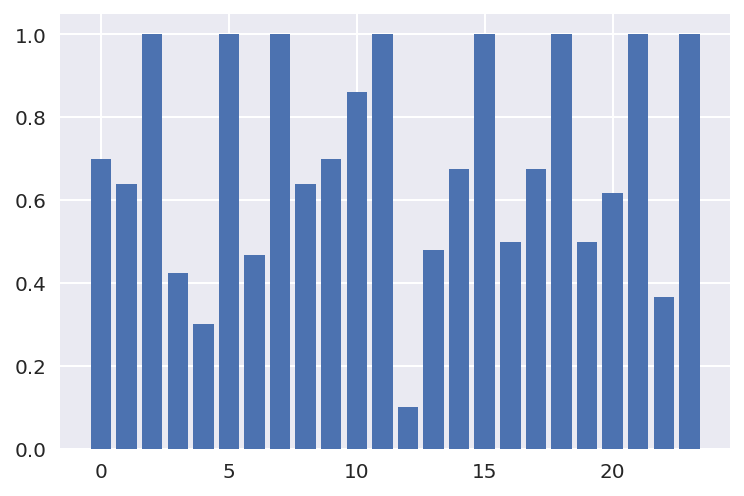

In [174]:
%matplotlib inline
plt.bar(x=range(24), height=np.divide(best_fairness.X[-1].sum(1), np.array(demands)[:,:-1]).reshape(-1))

<Container object of 24 artists>

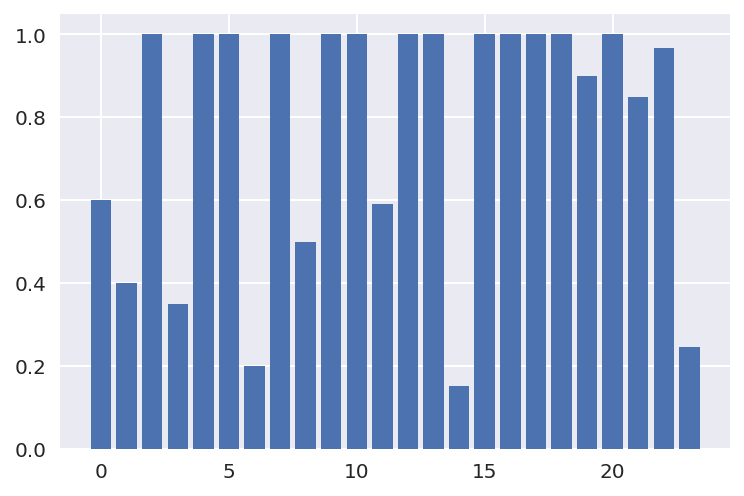

In [160]:
%matplotlib inline
plt.bar(x=range(24), height=np.divide(best_cost.X[-1].sum(1), np.array(demands)[:,:-1]).reshape(-1))

In [147]:
np.sum(np.divide(best_fairness.X[-1].sum(1), np.array(demands)[:,:-1]))

16.645

In [148]:
np.sum(np.divide(best_cost.X[-1].sum(1), np.array(demands)[:,:-1]))

18.75212121212121

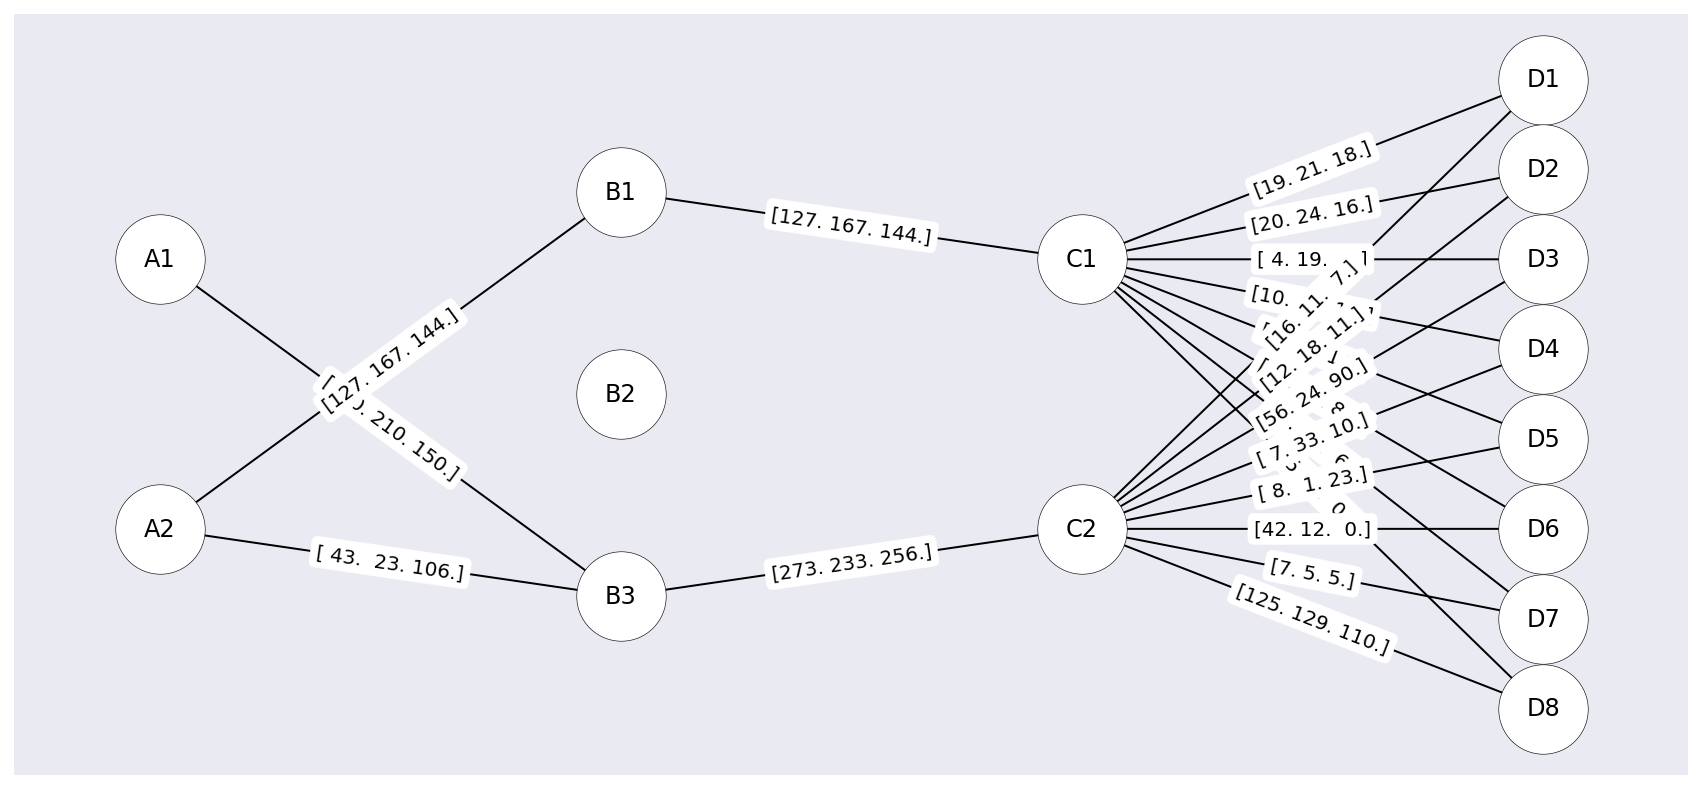

In [155]:
plot_graph(best_fairness.X, figsize=(15,7))

In [130]:
plt.close("all")

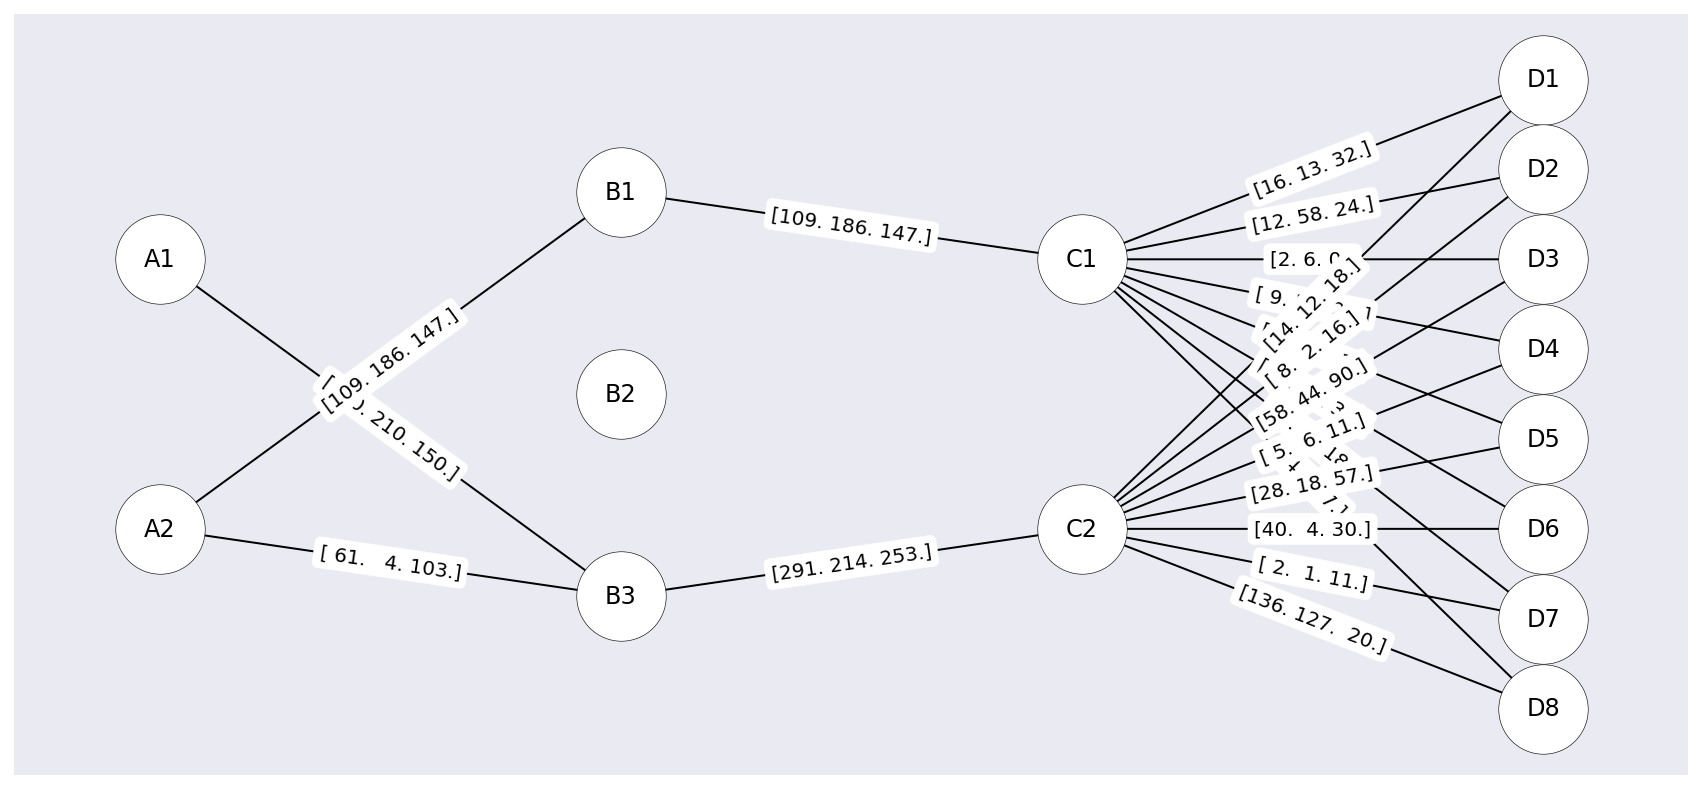

In [132]:
plot_graph(best_cost.X, figsize=(15,7))

In [83]:
v_space = max(s for x in best_cost.X for s in x.shape[1:])

In [91]:
nodes

[2, 3, 2, 8]

In [97]:
len(best_cost.X[0])

3

In [99]:
best_cost.X[0].shape

(3, 2, 3)

In [98]:
np.transpose(best_cost.X[0], (1,2,0))

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [230., 210., 150.]],

       [[109., 186., 147.],
        [  0.,   0.,   0.],
        [ 61.,   4., 103.]]])

In [75]:
best_cost.X[0]

array([[[  0.,   0., 230.],
        [109.,   0.,  61.]],

       [[  0.,   0., 210.],
        [186.,   0.,   4.]],

       [[  0.,   0., 150.],
        [147.,   0., 103.]]])